# Breast Tumor Classification Based on Fine Needle Aspiration

### Imports

In [1]:
from imports import *
from Functions import *

### Loading the Data Frame

In [2]:
bc2 = pd.read_csv('bc_data.csv', header = [1])

### Checking the Proportion of Benign Samples to Malignant Samples

Benign: 458
Malignant: 241
Proportion: 1.9 : 1


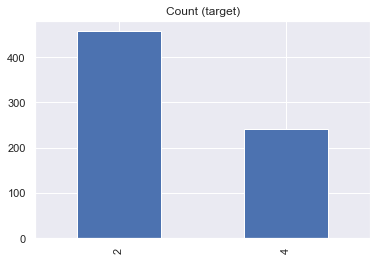

In [3]:
get_target_counts(bc2)

From the information above we can see that there is a class imbalance that has to be addressed before modeling if we want to avoid bias.

### Preparing For the Model

separate out the target class into its own series


In [4]:
target = bc2['Class']
bc2.drop('Class', axis = 1, inplace = True)

Clean the dataset

In [5]:
bc_data_full = prepare_data(bc2)

Separate the data into training and testing sets

In [6]:
features = bc_data_full
X = bc_data_full
y = target
features_train, features_test, target_train, target_test = train_test_split(X, y, test_size=0.25, random_state=1)

Perform over-sampling on the training set to address class imbalance

[(2, 340), (4, 340)]


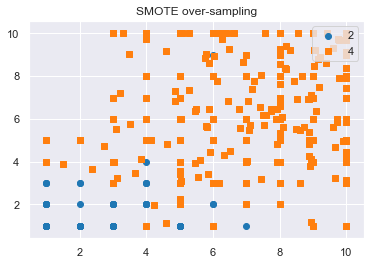

In [7]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(features_train, target_train)
print(sorted(Counter(y_sm).items()))

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

### Model Selection Using TPOT

In [ ]:
# tpot = TPOTClassifier(generations=50, population_size= 50, cv = 10, verbosity= 2, n_jobs= 1)
# tpot.fit(X_sm,y_sm)

![title](tpot.png)

Using the Extratrees model found by TPOT with the specified hyperparameters

In [8]:
extratrees = ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=6, n_estimators=100)
extratrees.fit(X_sm,y_sm)

extratrees_pred = extratrees.predict(features_test)

accuracy = accuracy_score(target_test, extratrees_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.14%


Visualizing one tree in the forest

![title](tree.png)

### Plotting the Confusion Matrix and Classification Report

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       118
           4       0.95      0.96      0.96        57

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



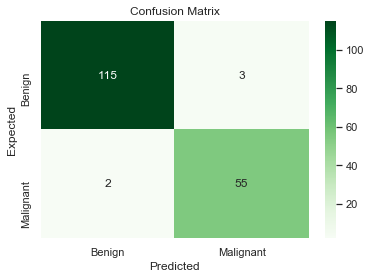

In [9]:
plot_confusion_matrix(target_test,extratrees_pred)

### Plotting Feature Importances to see what contributed most to my classification

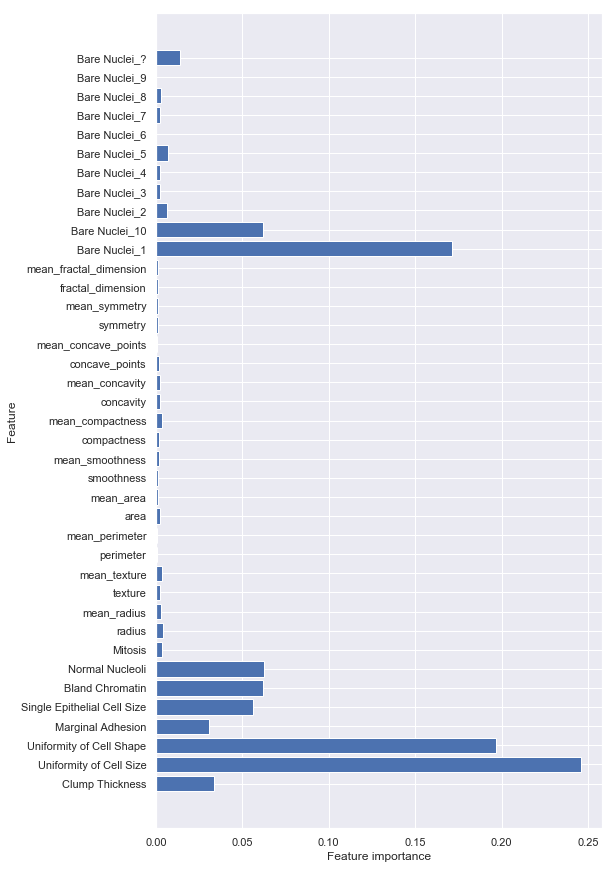

In [10]:
plot_feature_importances(features_train,extratrees)

### Plotting ROC curve and AUC score

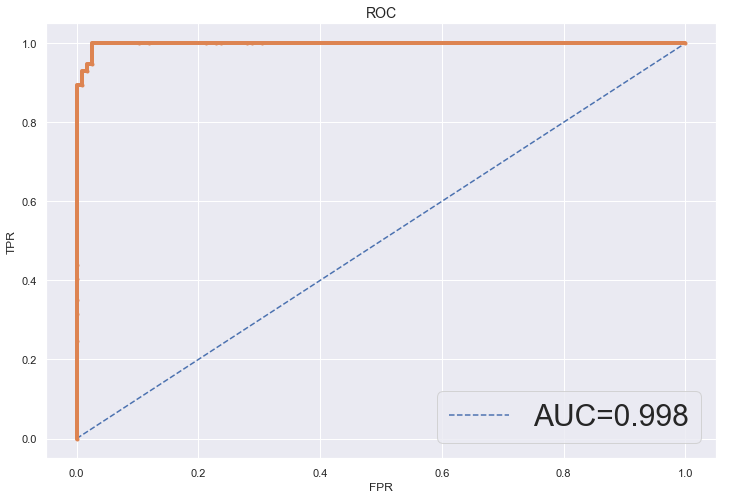

In [11]:
plot_ROC_curve(features_test,target_test,extratrees)

### Plotting Precision Recall Curve

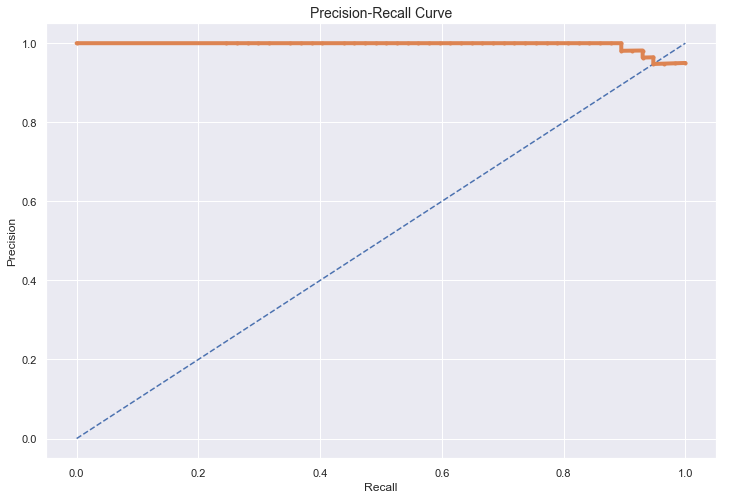

In [12]:
plot_precision_recall_curve(features_test,X_sm,target_test,extratrees)